In [21]:
%matplotlib inline
import os
from glob import glob
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D

from tensorflow.keras.layers import Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers


import cv2
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [22]:
def read_data(directory):
# =============================================================================
#  This function gets a directory name and returns all images in it concatenated 
#  to each other
# =============================================================================    
    data_list = glob(os.path.join(directory ,r'*.png'))
    #print(os.path.join(directory,'*.png'))
    data = np.asarray([cv2.imread(img,0) for img in data_list])
    return data


In [23]:
dataDir = "E:\Documents\Study\Deep Learning\Project\DATA"
data_name = "train2017"
annFile='{}/annotations/instances_{}.json'.format(dataDir,data_name)

In [24]:
# initialize COCO api for instance annotations
#coco=COCO(annFile)

In [25]:
# # display COCO categories and supercategories
# cats = coco.loadCats(coco.getCatIds())
# nms=[cat['name'] for cat in cats]
# print('COCO categories: \n{}\n'.format(' '.join(nms)))

# nms = set([cat['supercategory'] for cat in cats])
# print('COCO supercategories: \n{}'.format(' '.join(nms)))

In [26]:
# get all images containing given categories, select one at random
#catIds = coco.getCatIds(catNms=['person','sports ball']);
#imgIds = coco.getImgIds(catIds=catIds );
#imgIds = coco.getImgIds(imgIds = imgIds[2])
#img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [27]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
#I = io.imread(img['coco_url'])
#plt.axis('off')
#plt.imshow(I)
#plt.show()

In [28]:
# load and display instance annotations
#plt.imshow(I); plt.axis('off')
#annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
#anns = coco.loadAnns(annIds)
#coco.showAnns(anns)

In [29]:
# initialize COCO api for person keypoints annotations
#annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
#coco_kps=COCO(annFile)

In [30]:
# load and display keypoints annotations
#plt.imshow(I); plt.axis('off')
#ax = plt.gca()
#annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
#anns = coco_kps.loadAnns(annIds)
#coco_kps.showAnns(anns)

In [31]:
# initialize COCO api for caption annotations
#annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
#coco_caps=COCO(annFile)

In [32]:
# load and display caption annotations
#annIds = coco_caps.getAnnIds(imgIds=img['id']);
#anns = coco_caps.loadAnns(annIds)
#coco_caps.showAnns(anns)
#plt.imshow(I); plt.axis('off'); plt.show()

loading annotations into memory...
Done (t=13.07s)
creating index...
index created!


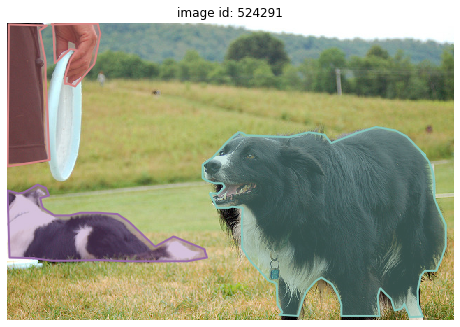

In [40]:
# the index of the image from the set just to visualize 
img_idx = 0

# load captions
#coco_caps= COCO(os.path.join(dataDir,r"annotations\captions_" + data_name + ".json"))
# Load insatnces -> here we take the masks
coco_instances = COCO(os.path.join(dataDir,r"annotations\instances_" + data_name + ".json"))
# Load key points
#coco_key_p = COCO(os.path.join(dataDir,r"annotations\person_keypoints_" + data_name + ".json")) 

# in the .getCatIds(catNms=[list of all ids we want to filter from the data]);
catIds = coco_instances.getCatIds(catNms=['dog','person']);
# get all the image id for all images based on the filter
imgIds = coco_instances.getImgIds(catIds=catIds);

# Visualize the img_idx specified up in the begining

I = io.imread(os.path.join(dataDir, data_name +r"//" +str(imgIds[img_idx]).zfill(12) + ".jpg"))
plt.imshow(I); 
plt.axis('off')
plt.title("image id: " + str(imgIds[img_idx]))
# and plot the mask
annIds = coco_instances.getAnnIds(imgIds=imgIds[img_idx], catIds=catIds, iscrowd=None)
anns = coco_instances.loadAnns(annIds)
coco_instances.showAnns(anns)

#plot key points
#annIds_keys = coco_key_p.getAnnIds(imgIds=imgIds[idx], catIds=catIds, iscrowd=None)
#anns_keys = coco_key_p.loadAnns(annIds_keys)
#coco_key_p.showAnns(anns_keys)

#print the caption
#annIds = coco_caps.getAnnIds(imgIds=imgIds[idx]);
#anns = coco_caps.loadAnns(annIds)
#coco_caps.showAnns(anns)

(-0.5, 639.5, 425.5, -0.5)

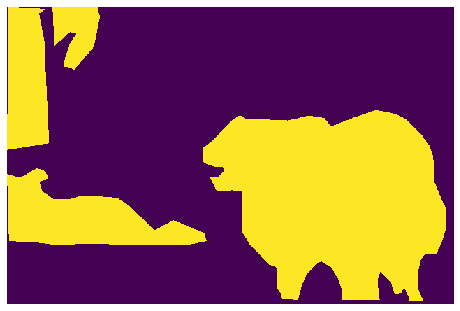

In [41]:
#visualize the mask of the annotaion
mask = int()
for i in range(len(anns)):
    mask += coco_instances.annToMask(anns[i])            
plt.imshow(mask)
plt.axis('off')



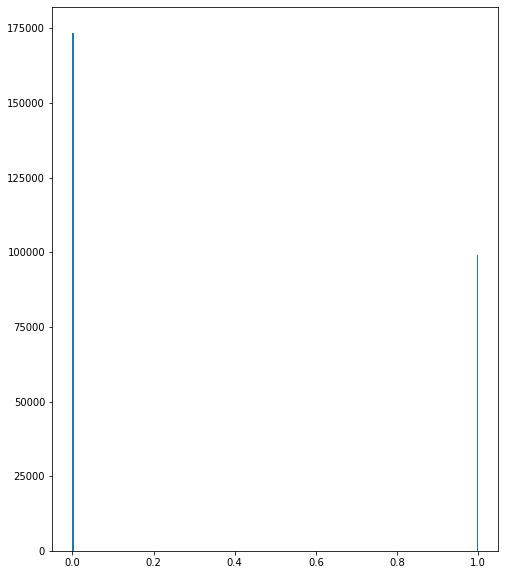

In [42]:
#cv2.imwrite(r"E:\Documents\Study\Deep Learning\Project\TEMP\1.jpg" , mask)
plt.hist(mask.ravel(),256, [0,1]);

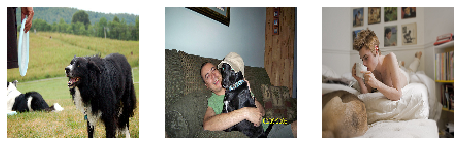

In [36]:
number_of_images = 3
img_width = 128
img_height = 128
for idx in range(number_of_images):
    plt.subplot(3,3,idx+1)
    I = io.imread(os.path.join(dataDir, data_name +r"//" +str(imgIds[idx]).zfill(12) + ".jpg"))
    I = cv2.resize(I, dsize=(img_width, img_height), interpolation=cv2.INTER_CUBIC)
    plt.imshow(I)
    plt.axis('off')


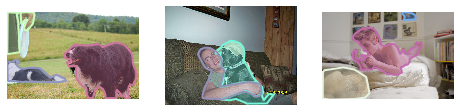

In [37]:

for idx in range(number_of_images):
    plt.subplot(3,3,idx+1)
    I = io.imread(os.path.join(dataDir, data_name +r"//" +str(imgIds[idx]).zfill(12) + ".jpg"))
    plt.imshow(I)
    annIds = coco_instances.getAnnIds(imgIds=imgIds[idx], catIds=catIds, iscrowd=None)
    anns = coco_instances.loadAnns(annIds)
    coco_instances.showAnns(anns)
    plt.axis('off')



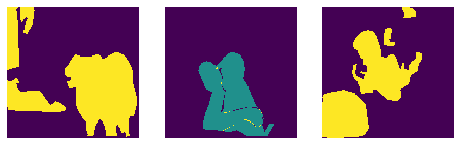

In [38]:

for idx in range(number_of_images):
    plt.subplot(3,3,idx+1)
    annIds = coco_instances.getAnnIds(imgIds=imgIds[idx], catIds=catIds, iscrowd=None)
    anns = coco_instances.loadAnns(annIds)
    mask = int()
    for i in range(len(anns)):
        mask += coco_instances.annToMask(anns[i])  
    mask = cv2.resize(mask, dsize=(img_width, img_height), interpolation=cv2.INTER_CUBIC)
    plt.imshow(mask)
    plt.axis('off')


[1, 18]

In [39]:
mask_list = []
for imgID in imgIds:
    annIds = coco_instances.getAnnIds(imgIds=imgID, catIds=catIds, iscrowd=None)
    anns = coco_instances.loadAnns(annIds)
    mask = float()
    for idx in range(len(anns)):
        mask += coco_instances.annToMask(anns[idx])  
    mask = cv2.resize(mask, dsize=(img_width, img_height), interpolation=cv2.INTER_CUBIC)
    #save mask to disk
    cv2.imwrite(r"E:\Documents\Study\Deep Learning\Project\MASKS\\" +str(imgID).zfill(12) + ".png" , mask)
    mask_list.append(mask)
#y_train = read_data(r'E:\Documents\Study\Deep Learning\Project\MASKS')
#y_train = (to_categorical(y_train)).astype('float')

y_train = np.asarray(mask_list)
y_train = (np.expand_dims(y_train, axis=3)).astype('float')
y_train = (to_categorical(y_train, dtype='float32')).astype('float')

print('y_train shape:', y_train.shape)


y_train shape: (2049, 128, 128, 5)


In [77]:
img_list = []
for imgID in imgIds:
    I = cv2.imread(os.path.join(dataDir, data_name +r"//" +str(imgID).zfill(12) + ".jpg"))
    I = cv2.resize(I, dsize=(img_width, img_height), interpolation=cv2.INTER_CUBIC)
    img_list.append(I)

x_train = np.asarray(img_list)  

print('x_train shape:', x_train.shape)

x_train shape: (76, 128, 128, 3)


(-0.5, 127.5, 127.5, -0.5)

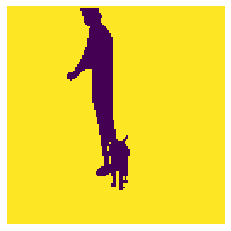

In [78]:
plt.imshow(y_train[0,:,:,0])
plt.axis('off')

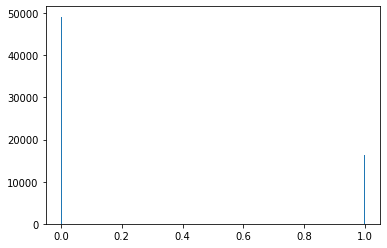

In [79]:
plt.hist(y_train[0].ravel(),256, [0,1]);

(-0.5, 639.5, 426.5, -0.5)

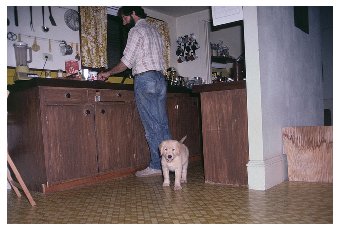

In [80]:
I = io.imread(os.path.join(dataDir, data_name +r"//" +str(imgIds[0]).zfill(12) + ".jpg"))
plt.imshow(I)
plt.axis('off')

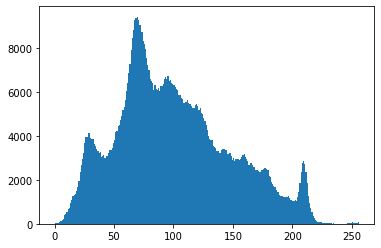

In [81]:
plt.hist(I.ravel(),256, [0,256]);

In [82]:
num_of_clss = y_train.shape[3]           # number of classes
lr =          1e-4        # learning rate 
beta_1 =      0.9         # beta 1 - for adam optimizer
beta_2 =      0.95        # beta 2 - for adam optimizer
epsilon =     1e-7        # epsilon - for adam optimizer
epochs =      20          # number of epochs
bs =          64          # batch size
dp =          0.5         # dropout probability

In [83]:


inp = Input(shape = (x_train.shape[1],x_train.shape[2],x_train.shape[3]))

# First conv block
x = Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(inp)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Second conv block
x = Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(dp)(x)

# Third conv block
x = Conv2D(16, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = Conv2D(16, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = Conv2D(16, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# DECONV AND UNPOOLING

x = Conv2DTranspose(16, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2DTranspose(32, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2DTranspose(64, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = UpSampling2D((2, 2))(x)

out = Conv2DTranspose(num_of_clss, (3, 3), strides=(1, 1), padding='same', activation = 'softmax')(x)


model = Model(inp,out)


In [84]:
# define the optimizer and compile the model
adam = optimizers.Adam(lr=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# add early stopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')


In [85]:
history = model.fit(x_train, y_train, validation_split=0.3, epochs=epochs, batch_size=bs)


Train on 53 samples, validate on 23 samples
Epoch 1/20
53/53 [==============================] - 3s 64ms/sample - loss: 1.5237 - accuracy: 0.2001 - val_loss: 2.1212 - val_accuracy: 0.1616
Epoch 2/20
53/53 [==============================] - 0s 6ms/sample - loss: 1.4655 - accuracy: 0.2307 - val_loss: 1.6488 - val_accuracy: 0.1753
Epoch 3/20
53/53 [==============================] - 0s 6ms/sample - loss: 1.4113 - accuracy: 0.2716 - val_loss: 1.3937 - val_accuracy: 0.2375
Epoch 4/20
53/53 [==============================] - 0s 6ms/sample - loss: 1.3547 - accuracy: 0.3229 - val_loss: 1.2399 - val_accuracy: 0.3586
Epoch 5/20
53/53 [==============================] - 0s 6ms/sample - loss: 1.3074 - accuracy: 0.3825 - val_loss: 1.1420 - val_accuracy: 0.4988
Epoch 6/20
53/53 [==============================] - 0s 6ms/sample - loss: 1.2584 - accuracy: 0.4537 - val_loss: 1.0775 - val_accuracy: 0.6203
Epoch 7/20
53/53 [==============================] - 0s 6ms/sample - loss: 1.2187 - accuracy: 0.5149 - v

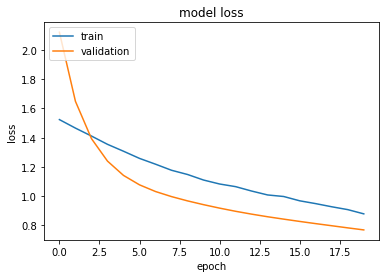

In [86]:
# plot train and validation loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show(); plt.close()

In [87]:
dataDir = "E:\Documents\Study\Deep Learning\Project\DATA"
data_name = "val2017"

coco_instances = COCO(os.path.join(dataDir,r"annotations\instances_" + data_name + ".json"))

# in the .getCatIds(catNms=[list of all ids we want to filter from the data]);
catIds = coco_instances.getCatIds(catNms=['cat']);
# get all the image id for all images based on the filter
imgIds = coco_instances.getImgIds(catIds=catIds);

img_list = []
for imgID in imgIds:
    I = cv2.imread(os.path.join(dataDir, data_name +r"//" +str(imgID).zfill(12) + ".jpg"))
    I = cv2.resize(I, dsize=(img_width, img_height), interpolation=cv2.INTER_CUBIC)
    img_list.append(I)

x_test = np.asarray(img_list).astype('float')

print('x_test shape:', x_test.shape)

loading annotations into memory...
Done (t=0.67s)
creating index...
index created!
x_test shape: (184, 128, 128, 3)


In [89]:

mask_list = []
for cnt, imgID in enumerate(imgIds):
    annIds = coco_instances.getAnnIds(imgIds=imgID, catIds=catIds, iscrowd=None)
    anns = coco_instances.loadAnns(annIds)
    mask = int()
    for idx in range(len(anns)):
        mask += coco_instances.annToMask(anns[idx])  
    mask = cv2.resize(mask, dsize=(img_width, img_height), interpolation=cv2.INTER_CUBIC)
    #save mask to disk
    cv2.imwrite(r"E:\Documents\Study\Deep Learning\Project\TestMASKS\\" +str(imgID).zfill(12) + ".png" , mask)
    mask_list.append(mask)
#y_train = read_data(r'E:\Documents\Study\Deep Learning\Project\MASKS')
#y_train = (to_categorical(y_train)).astype('float')

y_test = np.asarray(mask_list)
y_test = (np.expand_dims(y_test, axis=3)).astype('float')
y_test = (to_categorical(y_test, dtype='float32')).astype('float')

print('y_test shape:', y_test.shape)


y_test shape: (184, 128, 128, 3)


In [90]:
y_pred = model.predict(x_test)
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print results
print('test loss:', test_loss)
print('test accuracy:', test_acc)


ValueError: A target array with shape (184, 128, 128, 3) was passed for an output of shape (None, 128, 128, 4) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

In [ ]:
plt.subplot(3,3,1)
plt.imshow(np.squeeze(x_test[10,:,:]))
plt.axis('off')

plt.subplot(3,3,2)
plt.imshow(np.squeeze(x_test[20,:,:]))
plt.axis('off')

plt.subplot(3,3,3)
plt.imshow(np.squeeze(x_test[30,:,:]))
plt.axis('off')

plt.subplot(3,3,4)
plt.imshow(y_pred[10,:,:])
plt.axis('off')

plt.subplot(3,3,5)
plt.imshow(y_pred[20,:,:])
plt.axis('off')

plt.subplot(3,3,6)
plt.imshow(y_pred[30,:,:])
plt.axis('off')

plt.subplot(3,3,7)
plt.imshow(y_test[10,:,:])
plt.axis('off')

plt.subplot(3,3,8)
plt.imshow(y_test[20,:,:])
plt.axis('off')

plt.subplot(3,3,9)
plt.imshow(y_test[30,:,:])
plt.axis('off')